In [1]:
#This project creates a model that accurately predicts the likelihood of a new patient having heart disease in the future. 
#The project uses Heart Failure Prediction Dataset, found at: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dir_path = "C:/Users/rishd/Downloads/heart.csv"

heart_df = pd.read_csv(dir_path)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
heart_df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [6]:
heart_df.shape

(918, 12)

In [7]:
heart_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
heart_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


The above cell shows the corresponding statistics for each numerical column. 
The average age is around 53, with a standard deviation of 9 years. The lowest age is 28, with the median being at 54.
Looking at the Cholesterol column, a max of 600 is quite high, and may need further investigation. 
Same thing when looking at Max Heart Rate column, with the max value being at 202. Again, this is quite high and needs investigation. 
Overall, the dataset is clean, and contents no missing values. 

In [11]:
heart_df.isna().sum()
#Zero na values 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [12]:
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [16]:
cat_heart_df = heart_df.select_dtypes(include = ['object'])
cat_heart_df['FastingBS'] = heart_df['FastingBS']
cat_heart_df['HeartDisease'] = heart_df['HeartDisease']

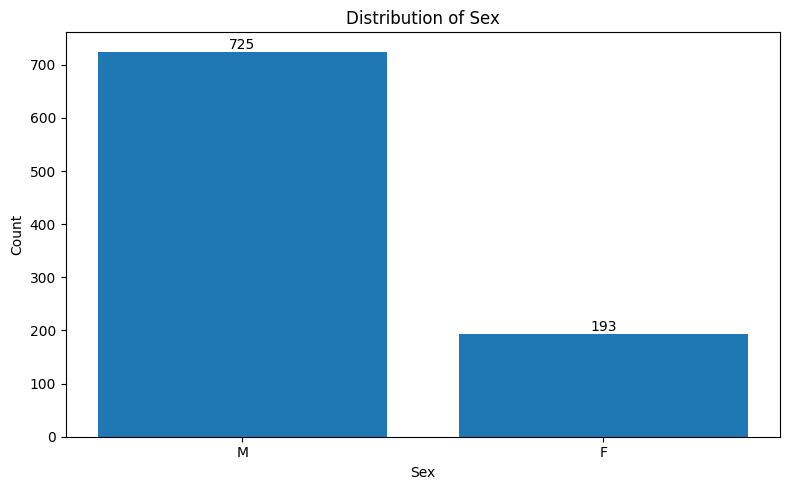

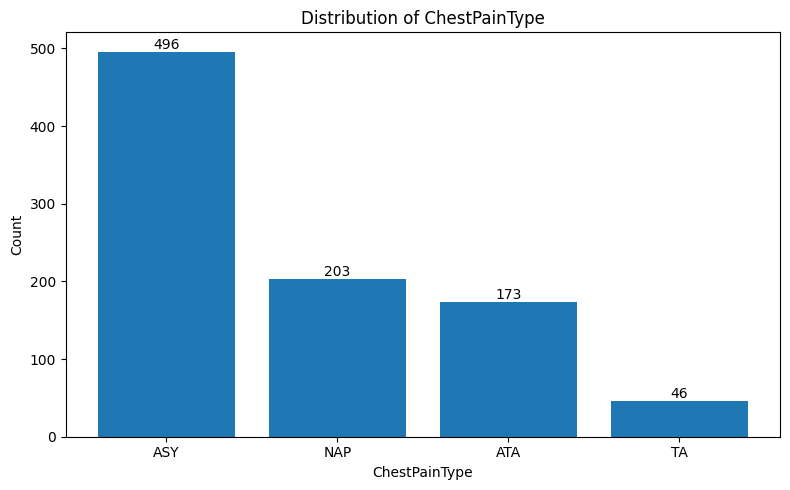

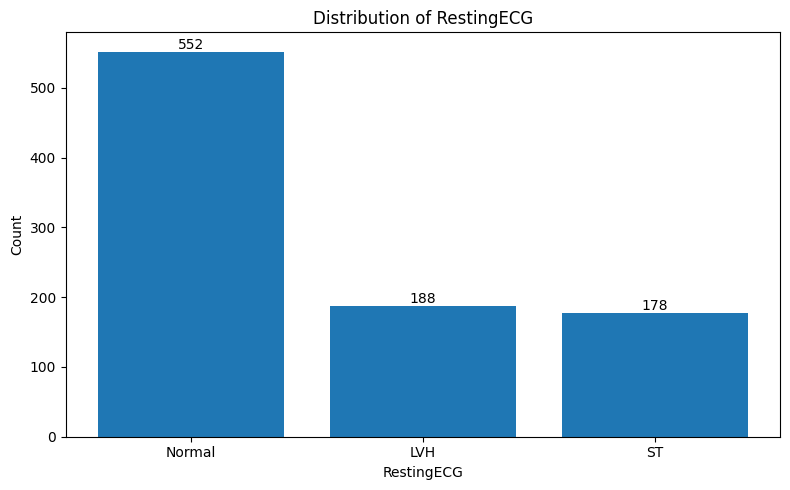

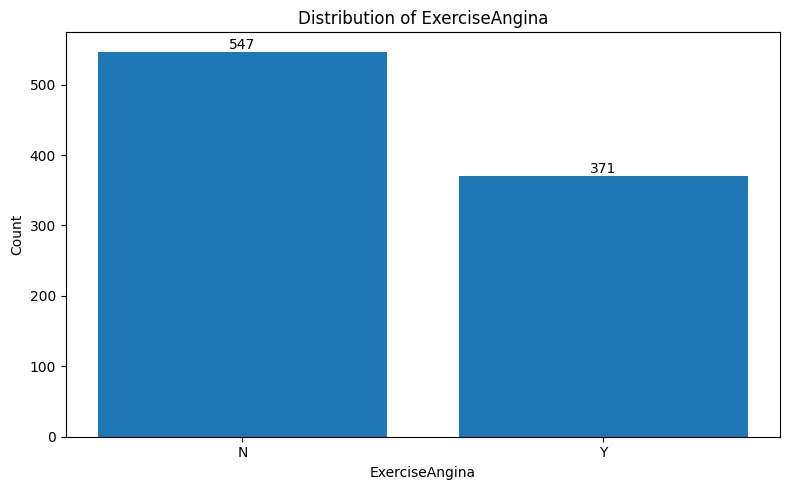

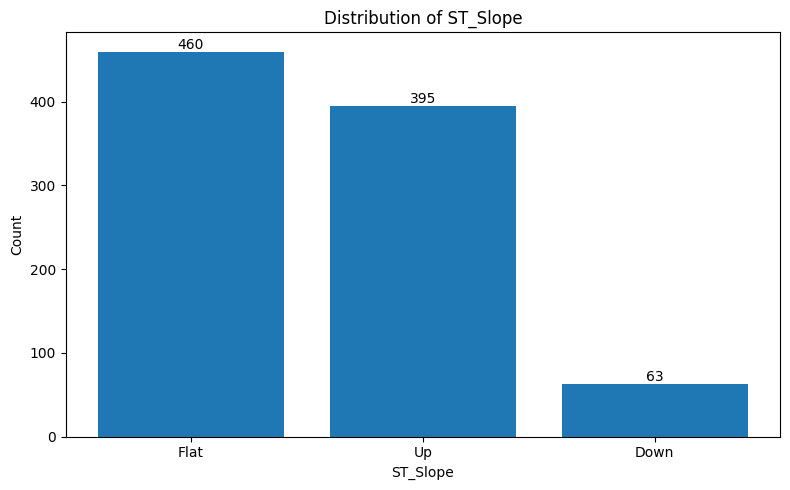

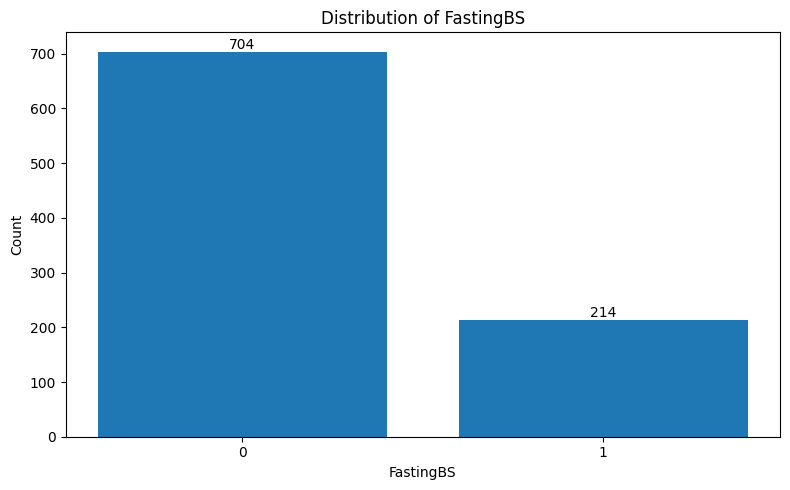

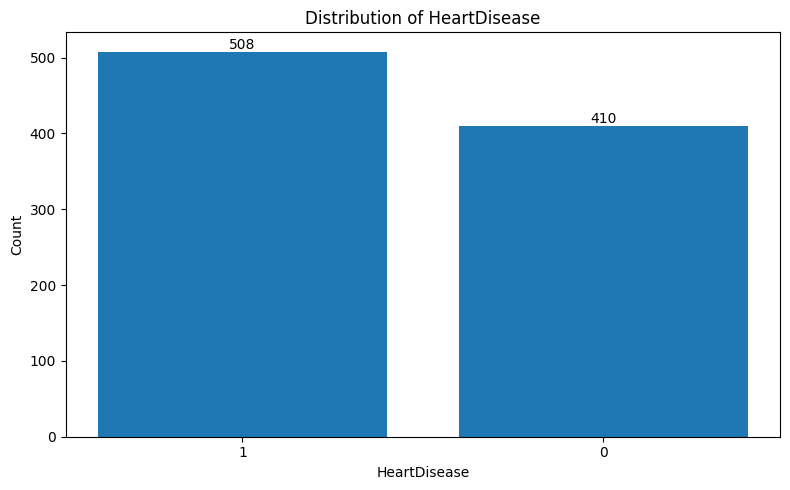

In [24]:
for column in cat_heart_df.columns:
    value_counts = cat_heart_df[column].value_counts()
    plt.figure(figsize = (8,5))
    bars = plt.bar(value_counts.index.astype(str), value_counts.values)

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha = 'center', va = 'bottom')

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()
    plt.show()

In [47]:
cat_heart_df.groupby(['FastingBS', 'HeartDisease']).size().unstack(fill_value = 0)

HeartDisease,0,1
FastingBS,,
0,366,338
1,44,170


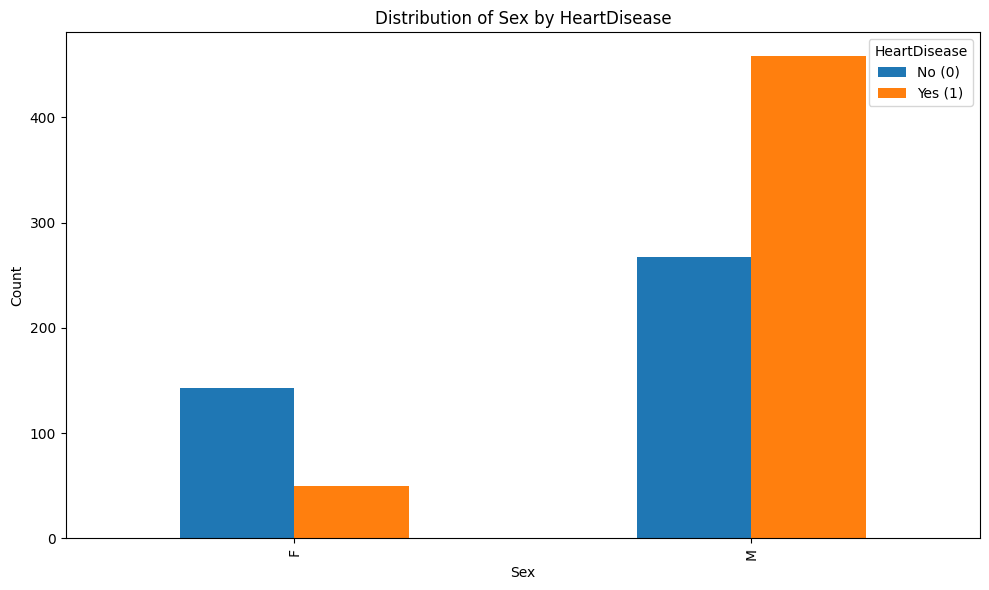

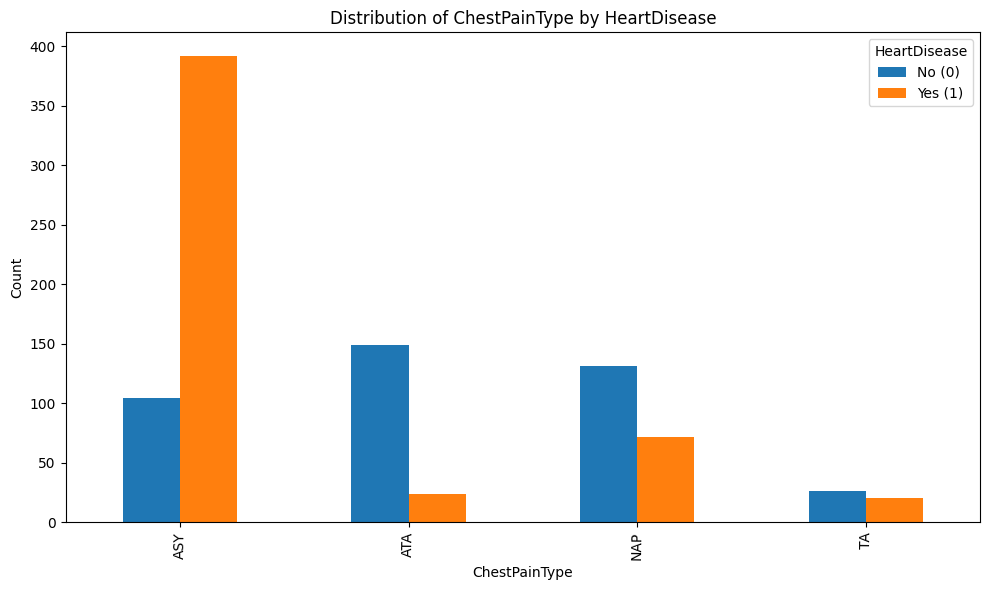

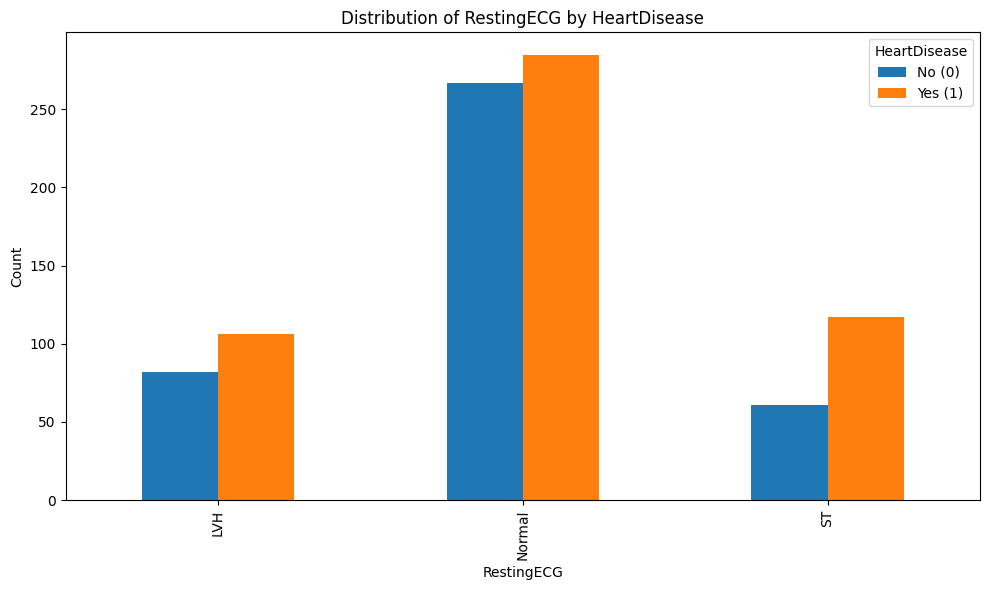

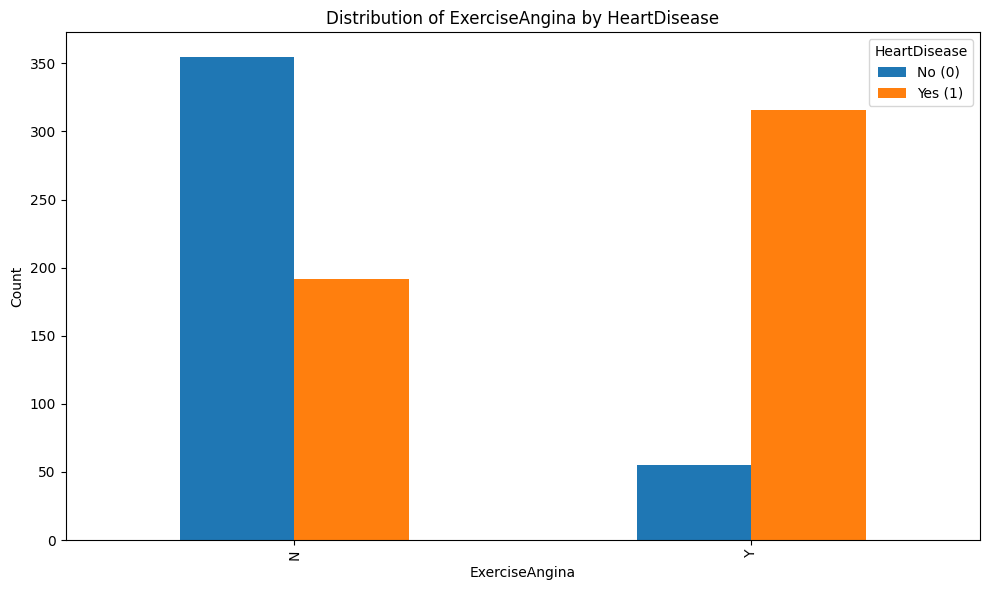

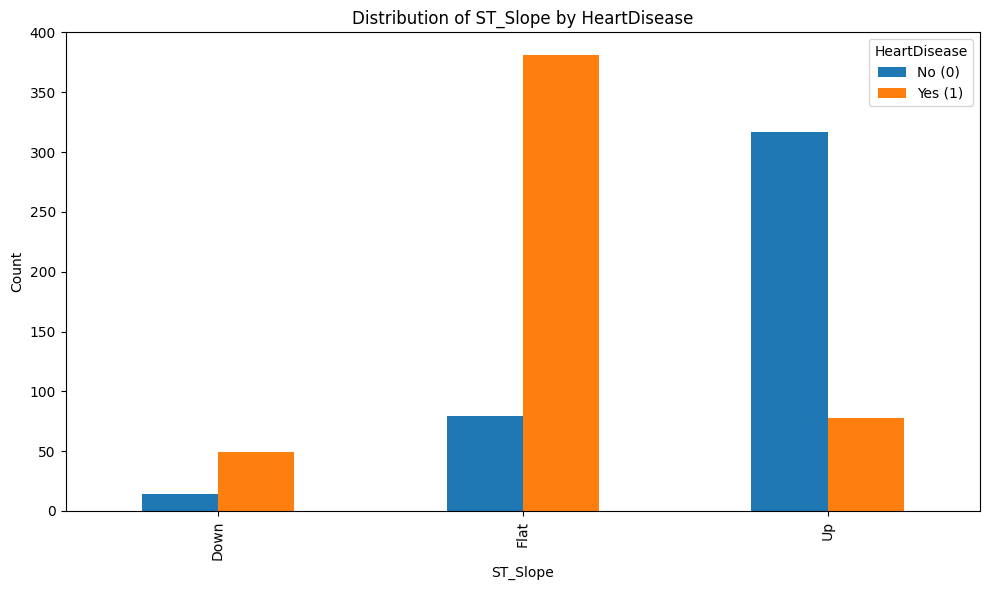

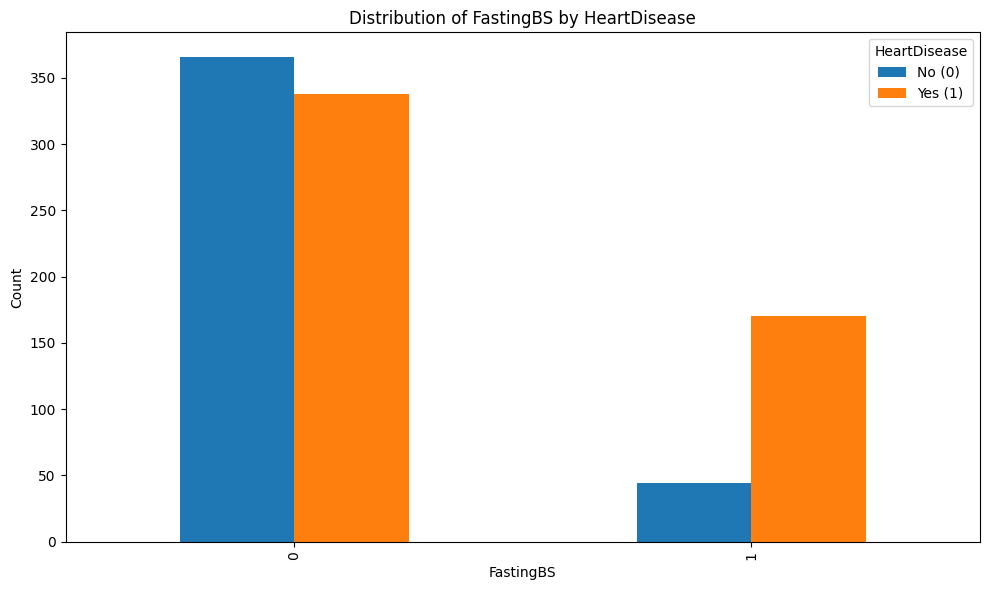

In [56]:
cat_cols = [col for col in cat_heart_df.columns if col != 'HeartDisease']

for column in cat_cols:
    group_counts = cat_heart_df.groupby([column, 'HeartDisease']).size().unstack()
    ax = group_counts.plot(kind = 'bar', figsize = (10,6))
        
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Distribution of {column} by HeartDisease')
    plt.legend(title='HeartDisease', labels=['No (0)', 'Yes (1)'])
    plt.xticks(rotation = 89)
    plt.tight_layout()
    plt.show()

In [57]:
cat_heart_df

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,FastingBS,HeartDisease
0,M,ATA,Normal,N,Up,0,0
1,F,NAP,Normal,N,Flat,0,1
2,M,ATA,ST,N,Up,0,0
3,F,ASY,Normal,Y,Flat,0,1
4,M,NAP,Normal,N,Up,0,0
...,...,...,...,...,...,...,...
913,M,TA,Normal,N,Flat,0,1
914,M,ASY,Normal,N,Flat,1,1
915,M,ASY,Normal,Y,Flat,0,1
916,F,ATA,LVH,N,Flat,0,1


In [66]:
disease_df = heart_df[(heart_df['HeartDisease'] == 1)]
total_num = disease_df.count()
num_df = disease_df[(disease_df['Age'] > 50) & (disease_df['Sex'] == 'M')]
counts = num_df.count()

percent = (counts / total_num)[0]

print(percent * 100)


67.71653543307087


C:\Users\rishd\AppData\Local\Temp\ipykernel_23892\2513777310.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percent = (counts / total_num)[0]


67% of patients with heart disease are male and over 50 years old

In [67]:
disease_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,F,ASY,140,241,0,Normal,123,Y,0.2,Flat,1
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1


In [68]:
disease_df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


The median age of patients who were diagnosed with heart disease is 57

In [72]:
#Data Cleaning
Resting_BP_ZC = len(heart_df[heart_df['RestingBP'] == 0])
Cholesterol_ZC = len(heart_df[heart_df['Cholesterol'] == 0])
print(Resting_BP_ZC)
print(Cholesterol_ZC)

1
172


In [78]:
Resting_BP_ZC_index = heart_df[heart_df['RestingBP'] == 0].index[0]
heart_df.drop(Resting_BP_ZC_index, axis = 0, inplace = True)
heart_df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [90]:
Chol_median = heart_df[heart_df['Cholesterol'] > 0].groupby('HeartDisease')['Cholesterol'].median()

Chol_median

HeartDisease
0    231.5
1    246.0
Name: Cholesterol, dtype: float64

In [91]:
heart_df.loc[heart_df['Cholesterol'] == 0, 'Cholesterol'] = (heart_df.loc[heart_df['Cholesterol'] == 0, 'HeartDisease'].map(Chol_median))

C:\Users\rishd\AppData\Local\Temp\ipykernel_23892\3390970560.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.  246.
 246.  246.  231.5 246.  246.  231.5 246.  246.  246.  231.5 246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5 246.  246.
 246.  246.  246.  231.5 246.  246.  246.  231.5 246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  231.5
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.  246.
 246.  246.  246.  231.5 231.5 246.  246.  246.  246.  246.  231.5 231.5
 246.  246